In [ ]:
#In this project I will be trying to answer the following questions...
#1:Does interest rate have a correlation to loan repayment?
#2:Which countries have the most loans repayed and the most current loans?
#3:What is the average amount borrowed by country?
#4:What span of time has the highest amount of loans issued and is there a correlation with interest rates?
#5:How often are loans being sold to a 3rd party?
#6:What is the average repayment time frame and does it differ by country?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\lajoi\OneDrive\Desktop\Portfolio Projects\IBRD_Statement_of_Loans_-_Latest_Available_Snapshot_20240720.csv")

In [3]:
df.head(10)

,End of Period,Loan Number,Region,Country Code,Country,Borrower,Guarantor Country Code,Guarantor,Loan Type,Loan Status,...,Repaid 3rd Party,Due 3rd Party,Loans Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,06/30/2024 12:00:00 AM,IBRD00010,EUROPE AND CENTRAL ASIA,FR,France,CREDIT NATIONAL,FR,France,NPL,Fully Repaid,...,2.499620e+08,0,0.0,11/01/1952 12:00:00 AM,05/01/1977 12:00:00 AM,05/09/1947 12:00:00 AM,05/09/1947 12:00:00 AM,06/09/1947 12:00:00 AM,12/31/1947 12:00:00 AM,NaN
1,06/30/2024 12:00:00 AM,IBRD00020,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,8.767200e+07,0,0.0,04/01/1952 12:00:00 AM,10/01/1972 12:00:00 AM,08/07/1947 12:00:00 AM,08/07/1947 12:00:00 AM,09/11/1947 12:00:00 AM,03/31/1948 12:00:00 AM,NaN
2,06/30/2024 12:00:00 AM,IBRD00021,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,3.955788e+06,0,0.0,04/01/1953 12:00:00 AM,04/01/1954 12:00:00 AM,05/25/1948 12:00:00 AM,08/07/1947 12:00:00 AM,06/01/1948 12:00:00 AM,06/30/1948 12:00:00 AM,NaN
3,06/30/2024 12:00:00 AM,IBRD00030,EUROPE AND CENTRAL ASIA,DK,Denmark,NaN,NaN,NaN,NPL,Fully Repaid,...,2.222900e+07,0,0.0,02/01/1953 12:00:00 AM,08/01/1972 12:00:00 AM,08/22/1947 12:00:00 AM,08/22/1947 12:00:00 AM,10/17/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
4,06/30/2024 12:00:00 AM,IBRD00040,EUROPE AND CENTRAL ASIA,LU,Luxembourg,NaN,NaN,NaN,NPL,Fully Repaid,...,1.014200e+07,0,0.0,07/15/1949 12:00:00 AM,07/15/1972 12:00:00 AM,08/28/1947 12:00:00 AM,08/28/1947 12:00:00 AM,10/24/1947 12:00:00 AM,03/31/1949 12:00:00 AM,NaN
5,06/30/2024 12:00:00 AM,IBRD00050,LATIN AMERICA AND CARIBBEAN,CL,Chile,Ministry of Finance,CL,Chile,NPL,Fully Repaid,...,1.333000e+06,0,0.0,07/01/1953 12:00:00 AM,07/01/1968 12:00:00 AM,03/25/1948 12:00:00 AM,03/25/1948 12:00:00 AM,04/07/1949 12:00:00 AM,12/31/1954 12:00:00 AM,NaN
6,06/30/2024 12:00:00 AM,IBRD00060,LATIN AMERICA AND CARIBBEAN,CL,Chile,Ministry of Finance,CL,Chile,NPL,Fully Repaid,...,1.745000e+06,0,0.0,07/01/1950 12:00:00 AM,01/01/1955 12:00:00 AM,03/25/1948 12:00:00 AM,03/25/1948 12:00:00 AM,04/07/1949 12:00:00 AM,01/01/1950 12:00:00 AM,NaN
7,06/30/2024 12:00:00 AM,IBRD00070,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,2.000000e+06,0,0.0,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,07/15/1948 12:00:00 AM,05/21/1948 12:00:00 AM,08/03/1948 12:00:00 AM,08/03/1948 12:00:00 AM,NaN
8,06/30/2024 12:00:00 AM,IBRD00071,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,2.000000e+06,0,0.0,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,07/15/1948 12:00:00 AM,05/21/1948 12:00:00 AM,08/03/1948 12:00:00 AM,08/03/1948 12:00:00 AM,NaN
9,06/30/2024 12:00:00 AM,IBRD00080,EUROPE AND CENTRAL ASIA,NL,Netherlands,NaN,NaN,NaN,NPL,Fully Repaid,...,2.000000e+06,0,0.0,01/15/1949 12:00:00 AM,07/15/1958 12:00:00 AM,07/15/1948 12:00:00 AM,05/21/1948 12:00:00 AM,08/03/1948 12:00:00 AM,08/03/1948 12:00:00 AM,NaN


In [ ]:
#1:Does interest rate have a correlation to loan repayment?

In [5]:
#First lets see what the values are in the column
print(df['Loan Status'].unique())

['Fully Repaid' 'Fully Cancelled' 'Repaying' 'Fully Transferred'
 'Terminated' 'Disbursing' 'Disbursing&Repaying' 'Fully Disbursed'
 'Effective' 'Signed' 'Approved']


In [6]:
# Finding null values
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
End of Period                      0
Loan Number                        0
Region                             0
Country Code                       3
Country                            0
Borrower                          57
Guarantor Country Code           283
Guarantor                        280
Loan Type                          0
Loan Status                        0
Interest Rate                    100
Currency of Commitment          9189
Project ID                         0
Project Name                       0
Original Principal Amount          0
Cancelled Amount                   0
Undisbursed Amount                 0
Disbursed Amount                   0
Repaid to IBRD                     0
Due to IBRD                        0
Exchange Adjustment                0
Borrower's Obligation              0
Sold 3rd Party                     0
Repaid 3rd Party                   0
Due 3rd Party                      0
Loans Held                         0
First Repa

In [ ]:
#I see there are 100 missing values from the interest rate column so I will remove those

In [8]:
df.dropna(subset=['Interest Rate'], inplace=True)
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
End of Period                      0
Loan Number                        0
Region                             0
Country Code                       3
Country                            0
Borrower                          57
Guarantor Country Code           283
Guarantor                        280
Loan Type                          0
Loan Status                        0
Interest Rate                      0
Currency of Commitment          9089
Project ID                         0
Project Name                       0
Original Principal Amount          0
Cancelled Amount                   0
Undisbursed Amount                 0
Disbursed Amount                   0
Repaid to IBRD                     0
Due to IBRD                        0
Exchange Adjustment                0
Borrower's Obligation              0
Sold 3rd Party                     0
Repaid 3rd Party                   0
Due 3rd Party                      0
Loans Held                         0
First Repa

In [43]:
fully_repaid_loans = df[df['Loan Status'] == 'Fully Repaid']
count_fully_repaid_loans = fully_repaid_loans.shape[0]  
print(f"Number of fully repayed loans:{count_fully_repaid_loans}")

Number of fully repayed loans:6502


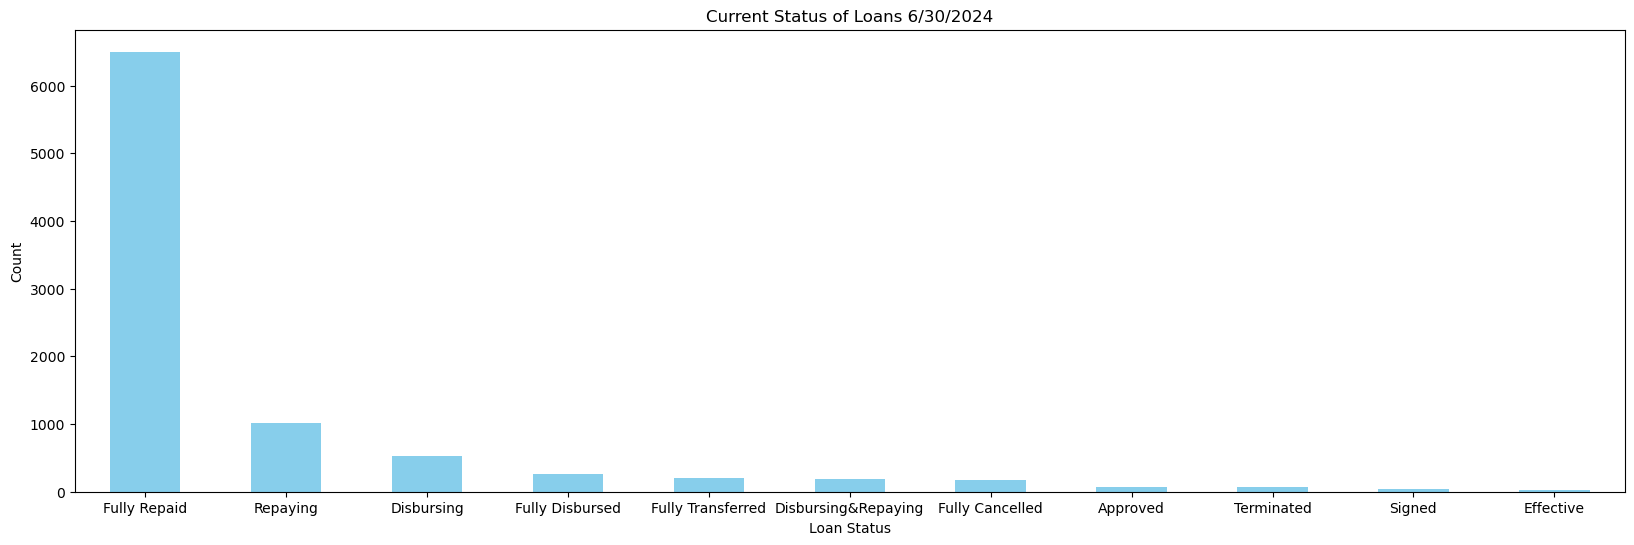

In [13]:
#I'm going to make a bar chart just so I can see the data a little better
import matplotlib.pyplot as plt

loan_count = df['Loan Status'].value_counts()

plt.figure(figsize=(20, 6))
loan_count.plot(kind='bar', color='skyblue')
plt.title('Current Status of Loans 6/30/2024')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Ok that helped me get an idea of what the current loan status looks like

In [25]:
#Now lets look an interest rates
#First lets see what the values are in the column
print(df['Interest Rate'].nunique())
print(df['Interest Rate'].unique())

460
[ 4.25    4.5     3.75    3.5625  4.      3.5     3.      3.875   4.875
  4.125   4.375   4.75    4.625   5.      5.5     5.625   5.75    6.
  5.375   0.      6.25    6.5     6.625   7.25    8.5     7.      8.
  7.5     6.15    5.21    8.85    4.85    8.9     8.7     8.2     6.03
  7.9     7.45    5.24    2.98    7.35    6.61    6.63    7.95    8.25
  4.11    9.25    9.6     8.76    6.65   10.6    11.6     7.2     7.96
  5.03    6.92    4.62    5.59    7.15    6.94    6.36    7.26    3.8
  8.66    6.54    5.67    5.11    6.18    5.01    6.89    6.9     6.71
  6.52    6.43    7.73    6.72    7.21    6.42    7.97    7.43    5.31
  5.32    8.59    7.23    6.44    4.26    6.7     7.08    7.54    7.36
  5.02    5.33    4.12    4.59    4.1     4.84    7.22    8.53    6.45
  5.43    5.46    3.43    6.4     8.32    5.16    4.36    7.07    4.81
  6.29    4.86    6.09    2.9     4.31    3.96    5.3     3.95    3.13
  5.98    4.09    5.91    0.49    6.82    3.28    6.75    0.31    7.02
  3.53

In [15]:
#That was alot so lets just see the range of the rates
range_value = max(df['Interest Rate']) - min(df['Interest Rate'])

print(f"The range of the Interest Rate is: {range_value}")

The range of the Interest Rate is: 11.6


Number of outliers: 0
Q1: 0.0
Q3: 7.21
IQR: 7.21
Lower Bound: -10.815
Upper Bound: 18.025
Number of outliers: 0


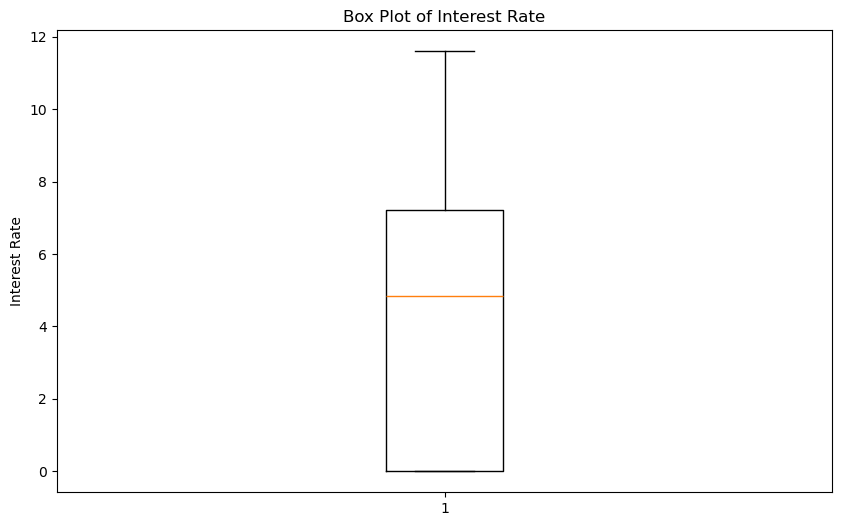

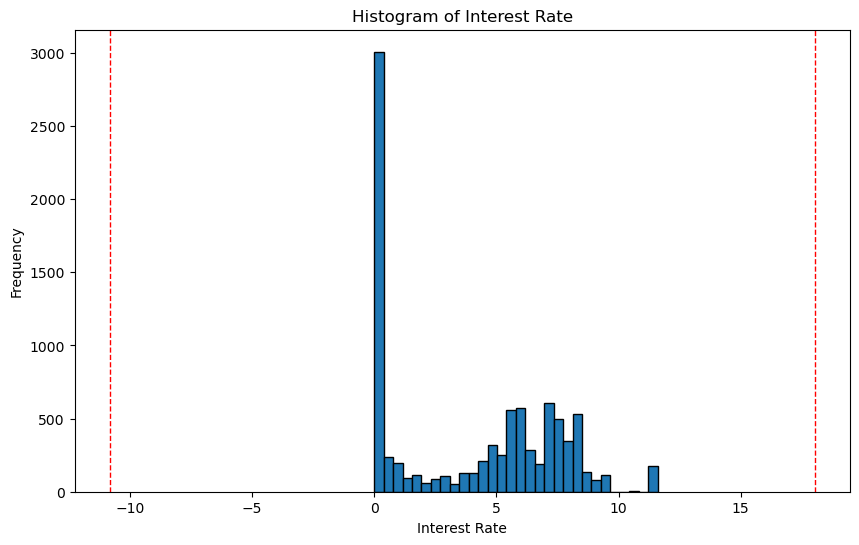

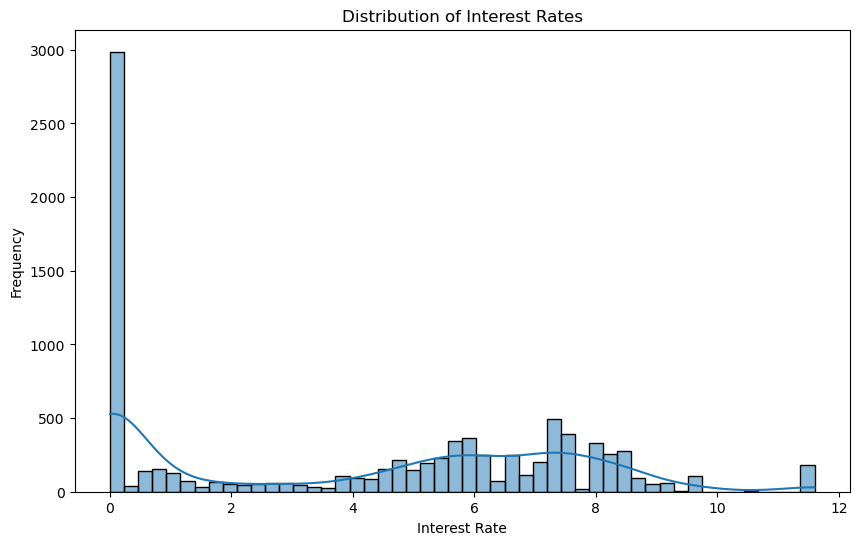

In [37]:
#Ok I'm not super familair with loan rates so let me dig deeper 
#Outlier Detection
import pandas as pd
import numpy as np

mean = df['Interest Rate'].mean()
std_dev = df['Interest Rate'].std()
threshold = 3
IRoutliers = df[(df['Interest Rate'] > mean + threshold * std_dev) |
              (df['Interest Rate'] < mean - threshold * std_dev)]

# Count the number of outliers
num_outliers = IRoutliers.shape[0]

print("Number of outliers:", num_outliers)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Interest Rate'].quantile(0.25)
Q3 = df['Interest Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print calculated bounds
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Identify outliers
# Count the number of outliers
outliers = df[(df['Interest Rate'] < lower_bound) | (df['Interest Rate'] > upper_bound)]
number_outliers = outliers.shape[0]
print("Number of outliers:", number_outliers)


plt.figure(figsize=(10, 6))
plt.boxplot(df['Interest Rate'].dropna())
plt.title('Box Plot of Interest Rate')
plt.ylabel('Interest Rate')
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(df['Interest Rate'].dropna(), bins=30, edgecolor='k')
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1)
plt.title('Histogram of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Interest Rate'], bins=50, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates')
plt.show()

In [ ]:
#Ok this yielded some insights we can see that a large portion of the loans are sub 1% interest loans and the data contains no outliers 
#I used the IQR and No outliers were within 3 standard deviation 

Original Skewness: 0.09689505292044225
Transformed Skewness: -0.34920429181441126


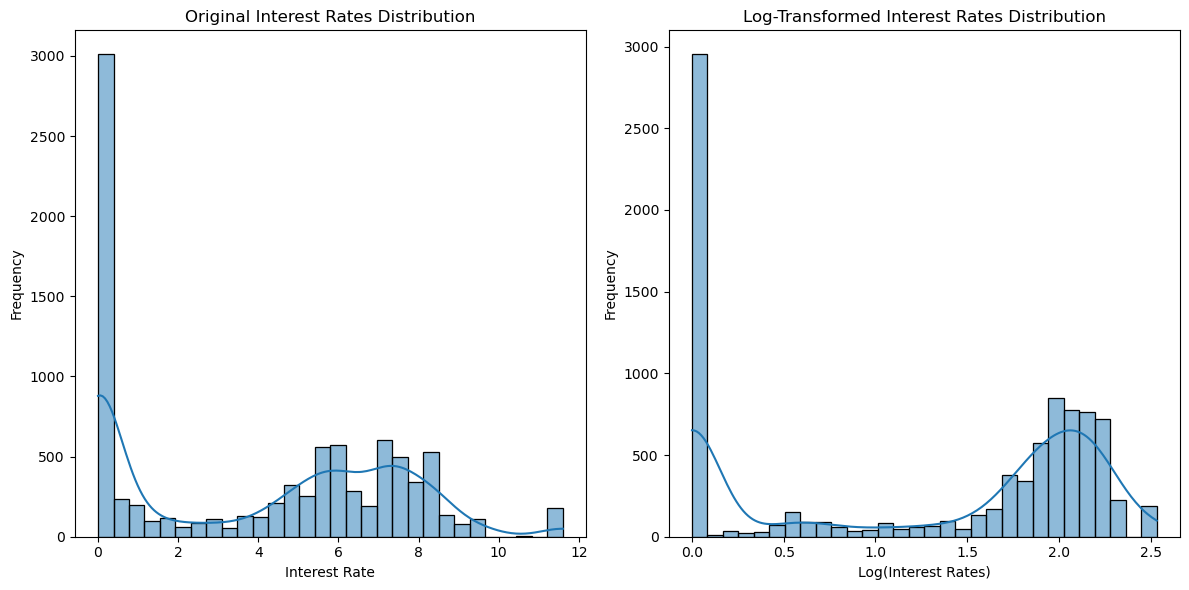

count    9089.000000
mean        1.239757
std         0.953285
min         0.000000
25%         0.000000
50%         1.764731
75%         2.105353
max         2.533697
Name: Interest Rate, dtype: float64

In [62]:
#I can see that the data isnt normally distributed and I would like to perform some machine learning so I wil use the log transformation method to transform the data
from scipy.stats import skew

original_skewness = skew(df['Interest Rate'])
print(f"Original Skewness: {original_skewness}")
log_transformed = np.log1p(df['Interest Rate'])  
new_skew = skew(log_transformed)
print(f"Transformed Skewness: {new_skew}")

#original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Interest Rate'], kde=True, bins=30)
plt.title('Original Interest Rates Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')

#tansformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed, kde=True, bins=30)
plt.title('Log-Transformed Interest Rates Distribution')
plt.xlabel('Log(Interest Rates)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

log_transformed.describe()

In [101]:
#Looking at the correlation between interest rates and loan payment
import statsmodels.api as sm
# Filter the data
df_filtered = df[df['Loan Status'] == 'Fully Repaid'].copy()
df_filtered['repaid_binary'] = 1
df_not_repaid = df[df['Loan Status'] != 'Fully Repaid'].copy()
df_not_repaid['repaid_binary'] = 0

# Combine the data
df_final = pd.concat([df_filtered, df_not_repaid])

# Define independent and dependent variables
X = df_final[['Interest Rate']]  # Replace with your actual column for interest rates
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df_final['repaid_binary']  # Dependent variable

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          repaid_binary   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3256.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):               0.00
Time:                        13:31:59   Log-Likelihood:                -4272.5
No. Observations:                9089   AIC:                             8549.
Df Residuals:                    9087   BIC:                             8563.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4475      0.006     72.079

              precision    recall  f1-score   support

  Not Repaid       0.70      0.84      0.76       742
Fully Repaid       0.93      0.86      0.90      1985

    accuracy                           0.86      2727
   macro avg       0.81      0.85      0.83      2727
weighted avg       0.87      0.86      0.86      2727



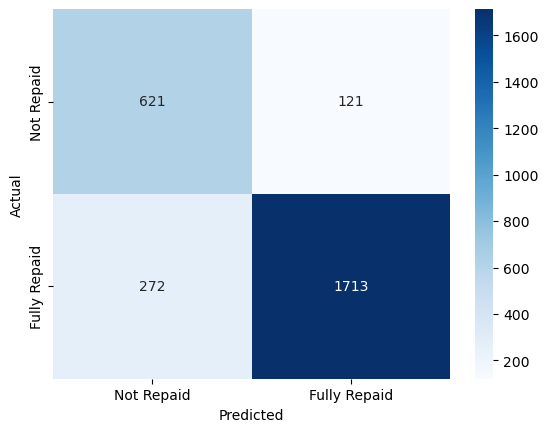

In [105]:
#Lets do some machine learning on the transformed data to try and make some predictions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Filter the data
df_filtered = df[df['Loan Status'] == 'Fully Repaid'].copy()
df_filtered['repaid_binary'] = 1
df_not_repaid = df[df['Loan Status'] != 'Fully Repaid'].copy()
df_not_repaid['repaid_binary'] = 0
df_final = pd.concat([df_filtered, df_not_repaid])

# Prepare feature matrix (X) and target vector (y)
X = log_transformed  # Make sure this is a DataFrame or 2D array
y = df_final['repaid_binary']

# Ensure X and y have the same indices
X = X[~X.index.duplicated(keep='first')]
y = y[~y.index.duplicated(keep='first')]
y = y.reindex(X.index)

# Ensure X is 2D
if X.ndim == 1:
    X = X.values.reshape(-1, 1)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Repaid', 'Fully Repaid']))

# Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Repaid', 'Fully Repaid'], 
            yticklabels=['Not Repaid', 'Fully Repaid'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [102]:
#In conclusion with the data available the data indicates a positive relationship between interest rates and the likelihood of a loan being fully repaid, with the interest rate being a statistically significant predictor.
#However the relatively low R-squared value suggests that the interest rate alone does not explain a large portion of the variance in loan repayment, and other factors might be influencing this outcome.
#The logistic regression was relatively accurate with an 86% accuracy.

In [173]:
#2:Which countries have the most loans repayed and the most current loans?
fully_repaid_loans = df[df['Loan Status'] == 'Fully Repaid']

repaid_loans_count = fully_repaid_loans.groupby('Country').size()

repaid_loans_df = repaid_loans_count.reset_index(name='Repaid Loans')

top_repaid_loans_countries = repaid_loans_df.sort_values(by='Repaid Loans', ascending=False).head(20)

print(top_repaid_loans_countries)



                Country  Repaid Loans
57            Indonesia           479
16               Brazil           345
81               Mexico           320
126             Turkiye           244
23                China           239
99          Philippines           227
84              Morocco           226
24             Colombia           217
56                India           208
125             Tunisia           192
2             Argentina           181
98                 Peru           135
122            Thailand           125
68   Korea, Republic of           125
77             Malaysia           122
1               Algeria           115
36              Ecuador           102
22                Chile            99
102             Romania            98
28        Cote d'Ivoire            97


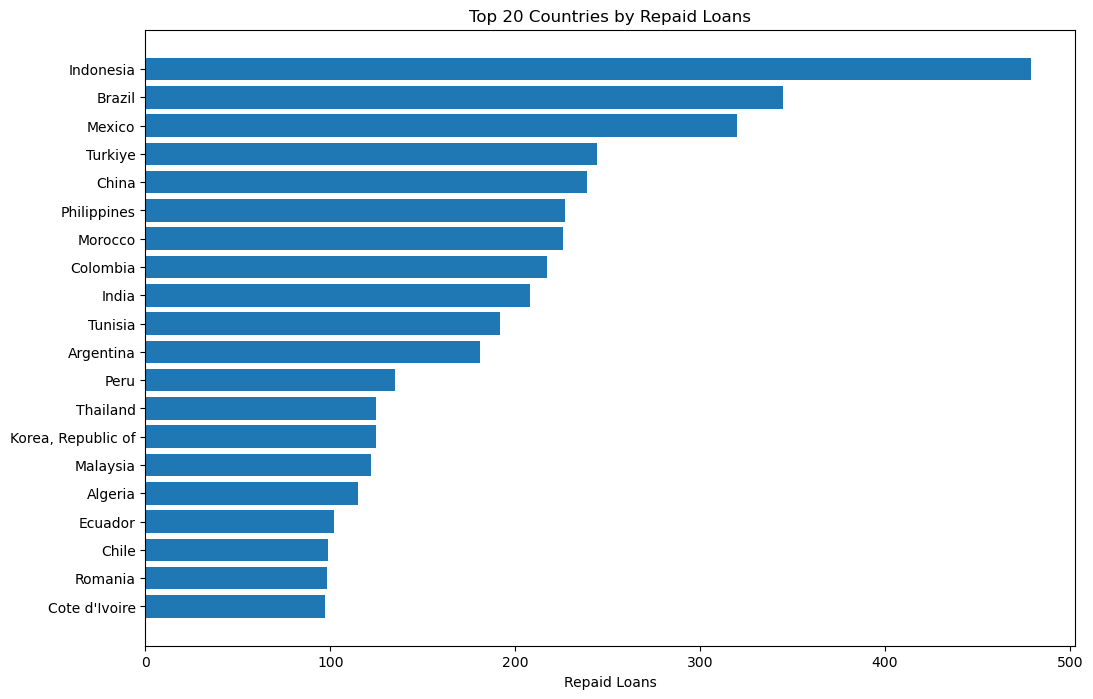

In [180]:
#Top 20 countries by repaid loans
plt.figure(figsize=(12, 8))
plt.barh(top_repaid_loans_countries['Country'], top_repaid_loans_countries['Repaid Loans'])
plt.xlabel('Repaid Loans')
plt.title('Top 20 Countries by Repaid Loans')
plt.gca().invert_yaxis()
plt.show()

In [182]:
#Top 20 countries with current loans
current_loans = df[df['Loan Status'] == 'Repaying']

current_loans_count = current_loans.groupby('Country').size()

current_loans_df = current_loans_count.reset_index(name='Current Loans')

top_current_loans_countries = current_loans_df.sort_values(by='Current Loans', ascending=False).head(20)

print(top_current_loans_countries)


                    Country  Current Loans
15                    China            157
12                   Brazil             93
30                    India             71
31                Indonesia             71
43                  Morocco             41
62                  Turkiye             34
22  Egypt, Arab Republic of             33
3                 Argentina             33
50              Philippines             26
63                  Ukraine             21
61                  Tunisia             20
5                Azerbaijan             20
67                 Zimbabwe             19
34                  Jamaica             18
4                   Armenia             18
35                   Jordan             17
54                   Serbia             17
45          North Macedonia             17
47                   Panama             16
0                   Albania             15


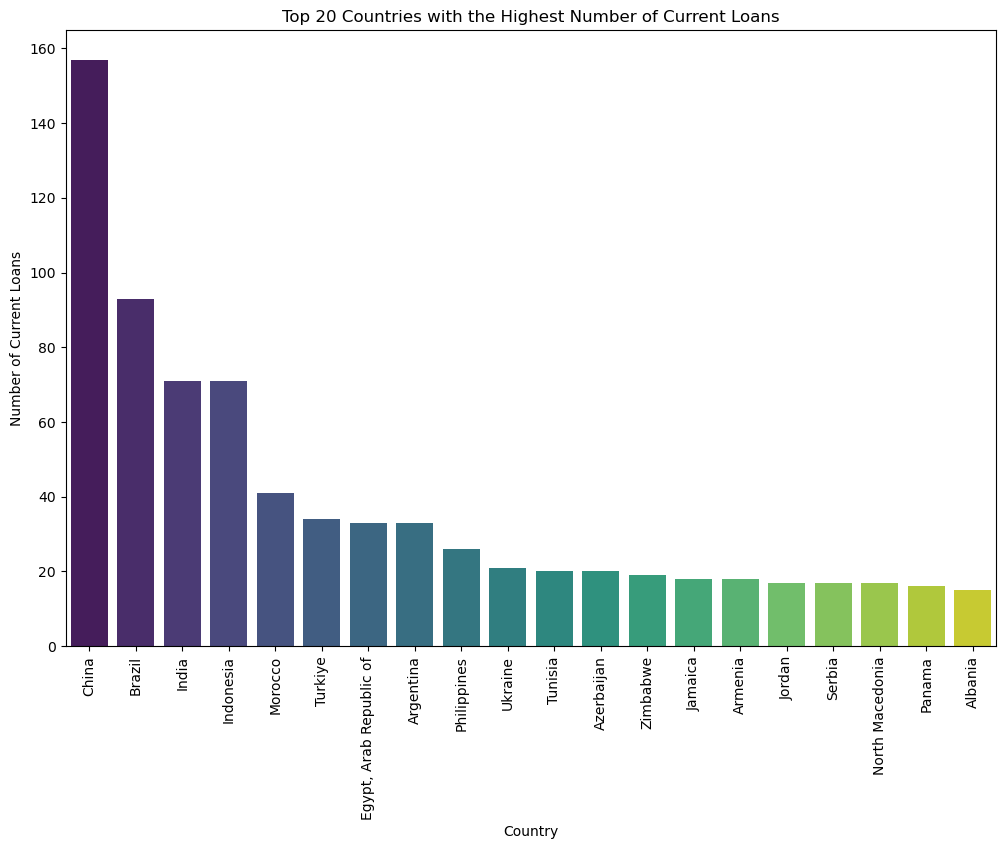

In [184]:
#Top 20 countries with current loans
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Current Loans', data=top_current_loans_countries, hue='Country', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Current Loans')
plt.title('Top 20 Countries with the Highest Number of Current Loans')
plt.show()

In [171]:
#3:What is the average amount borrowed by country?
average_loan_amount_by_country = df.groupby('Country')['Original Principal Amount'].mean().reset_index()
average_loan_amount_by_country = average_loan_amount_by_country.sort_values(by='Original Principal Amount', ascending=False).head(20)
print(f"This is the top 20 average loan amounts by country:\n{average_loan_amount_by_country}")

This is the top 20 average loan amounts by country:
                     Country  Original Principal Amount
73                    Kosovo               3.856451e+08
117             South Africa               3.587000e+08
63                      Iraq               2.891400e+08
47                    France               2.500000e+08
137                  Ukraine               2.477242e+08
2                     Angola               2.465556e+08
106                   Poland               2.056325e+08
141                 Viet Nam               2.009554e+08
60                     India               1.983691e+08
40   Egypt, Arab Republic of               1.963796e+08
70                Kazakhstan               1.880470e+08
109       Russian Federation               1.704952e+08
86                    Mexico               1.600530e+08
134                  Turkiye               1.559202e+08
4                  Argentina               1.476393e+08
108                  Romania               1.410571e

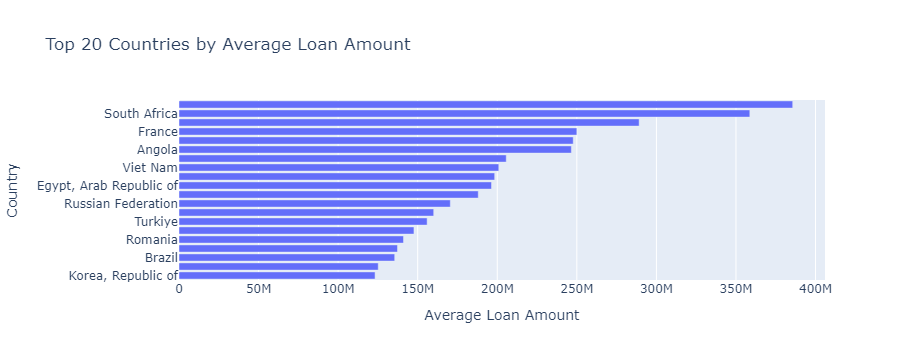

In [160]:
#A bar chart showing the top 20 countries average loan amount
top_countries = average_loan_amount_by_country.head(20).sort_values(by='Original Principal Amount', ascending=False)

fig = px.bar(top_countries, x='Original Principal Amount', y='Country', orientation='h',
             title='Top 20 Countries by Average Loan Amount',
             labels={'Original Principal Amount': 'Average Loan Amount', 'Country': 'Country'},
             category_orders={'Country': top_countries['Country'].tolist()})
fig.update_layout(height=600)
fig.show()

In [224]:
#4:What span of time has the highest amount of loans issued and is there a correlation with interest rates?
import pandas as pd

df['Agreement Signing Date'] = pd.to_datetime(df['Agreement Signing Date'], errors='coerce')

df['YearMonth'] = df['Agreement Signing Date'].dt.to_period('M')

monthly_data = df.groupby('YearMonth').agg(
    number_of_loans_signed=('Loan Number', 'count'),
    average_interest_rate=('Interest Rate', 'mean')
).reset_index()

# Define the independent and dependent variables
X = monthly_data['average_interest_rate']
y = monthly_data['number_of_loans_signed']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

correlation = monthly_data['number_of_loans_signed'].corr(monthly_data['average_interest_rate'])
print(f'Correlation between number of loans signed and average interest rates: {correlation:.2f}')


                              OLS Regression Results                              
Dep. Variable:     number_of_loans_signed   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                  0.003
Method:                     Least Squares   F-statistic:                     3.991
Date:                    Sat, 20 Jul 2024   Prob (F-statistic):             0.0461
Time:                            19:06:34   Log-Likelihood:                -3089.7
No. Observations:                     865   AIC:                             6183.
Df Residuals:                         863   BIC:                             6193.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [229]:
#While the regression analysis shows a statistically significant relationship between the average interest rate and the number of loans signed. 
#The very low R-squared value and the weak correlation suggest that the average interest rate alone does not explain much of the variation in the number of loans signed.

In [238]:
#5:How many loans are being sold to a 3rd party?
num_loans_sold = df[df['Sold 3rd Party'] > 0].shape[0]

total_loans = df.shape[0]

proportion_sold = num_loans_sold / total_loans

print(f"Total number of loans: {total_loans}")
print(f"Number of loans sold to a 3rd party: {num_loans_sold}")
print(f"Proportion of loans sold to a 3rd party: {proportion_sold:.2%}")

Total number of loans: 9089
Number of loans sold to a 3rd party: 871
Proportion of loans sold to a 3rd party: 9.58%


The average repayment timeframe is: 4753.0 days
The Top 20 quickest loan repayment countries:
                                 Country  Repayment Duration
92                               Namibia              1157.0
115                      Slovak Republic              2391.0
24                                  Chad              2739.0
99                                  Oman              2873.0
58                               Hungary              3088.0
93                           Netherlands              3220.0
12                               Belarus              3280.0
138                              Uruguay              3307.0
34                               Czechia              3325.0
86                                Mexico              3408.0
131                                 Togo              3471.0
104                                 Peru              3500.0
42                               Estonia              3516.0
140  Venezuela, Republica Bolivariana de            

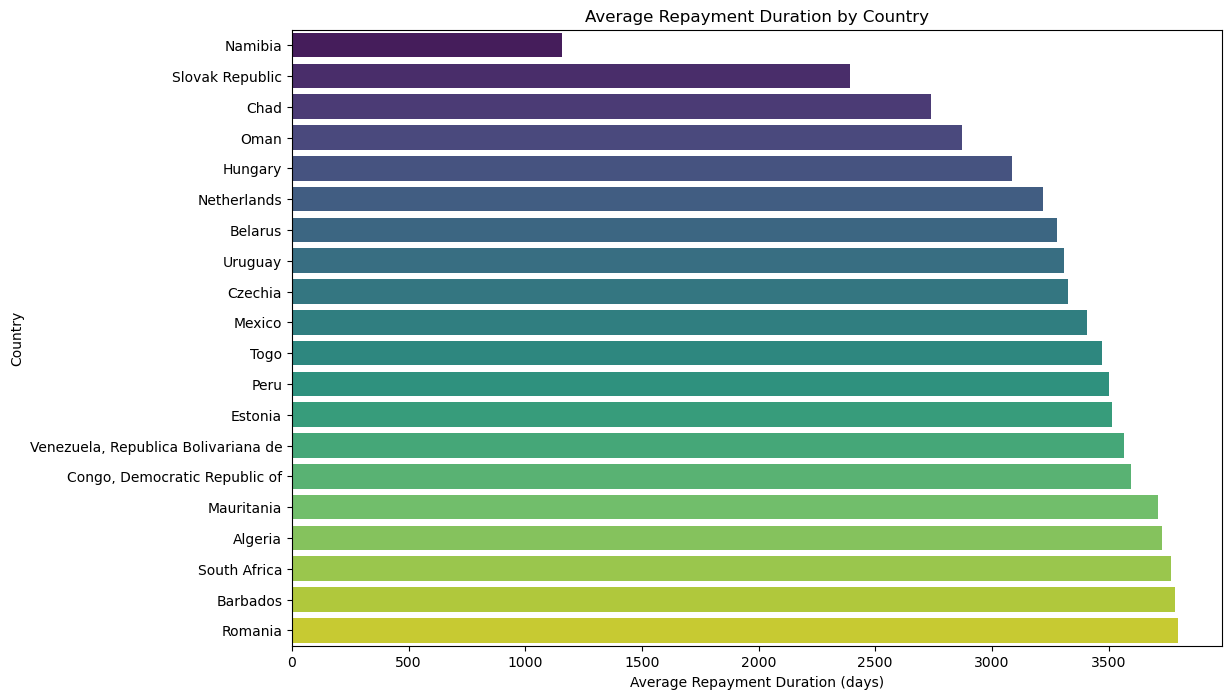

In [259]:
#6:What is the average repayment time frame and does it differ by country?

df['First Repayment Date'] = pd.to_datetime(df['First Repayment Date'], errors='coerce')
df['Last Repayment Date'] = pd.to_datetime(df['Last Repayment Date'], errors='coerce')

df['Repayment Duration'] = (df['Last Repayment Date'] - df['First Repayment Date']).dt.days

average_repayment = df['Repayment Duration'].mean().round(0)

average_repayment_by_country = df.groupby('Country')['Repayment Duration'].mean().reset_index()
average_repayment_by_country = average_repayment_by_country.sort_values(by='Repayment Duration', ascending=True).head(20)
average_repayment_by_country['Repayment Duration'] = average_repayment_by_country['Repayment Duration'].round(0)

print(f"The average repayment timeframe is: {average_repayment} days")
print("The Top 20 quickest loan repayment countries:")
print(average_repayment_by_country)
print(f"Repayment duration is measured in days")

plt.figure(figsize=(12, 8))
sns.barplot(x='Repayment Duration', y='Country', data=average_repayment_by_country, hue='Country', palette='viridis', legend=False)
plt.xlabel('Average Repayment Duration (days)')
plt.ylabel('Country')
plt.title('Average Repayment Duration by Country')
plt.show()


In [ ]:
#If you've made it this far I'd like to thank you for your time :-)